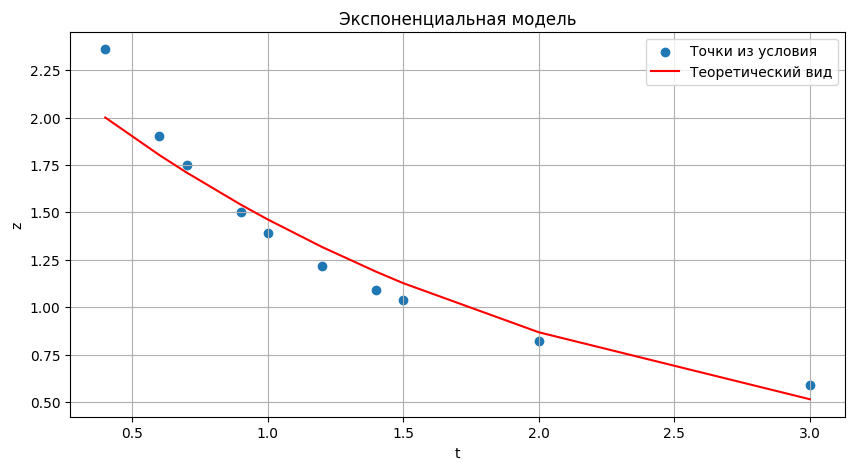

Сумма квадратов отклонений для экспоненциальной модели: 0.182


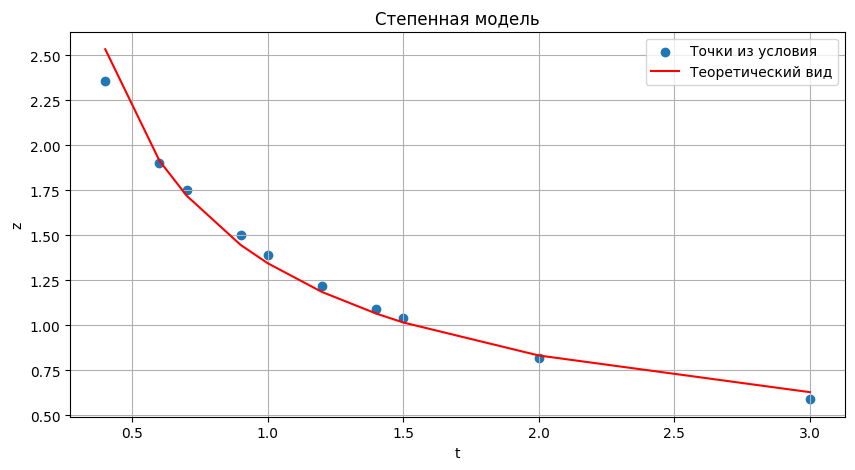

Сумма квадратов отклонений для степенной модели: 0.040


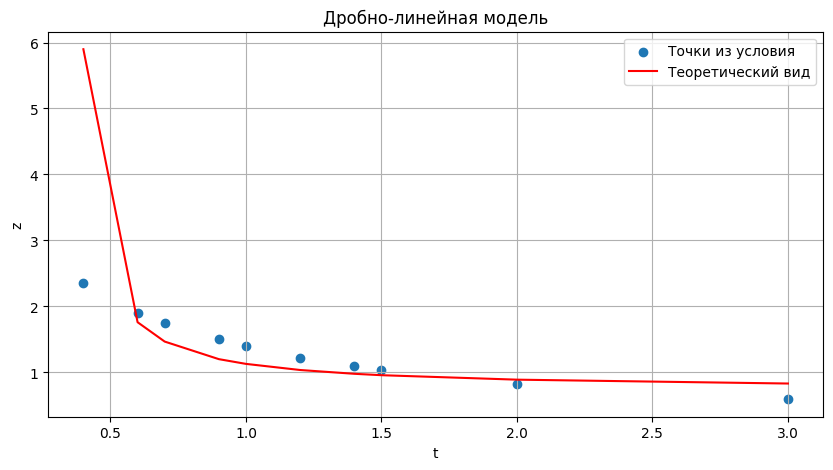

Сумма квадратов отклонений для дробно-линейной модели: 12.899


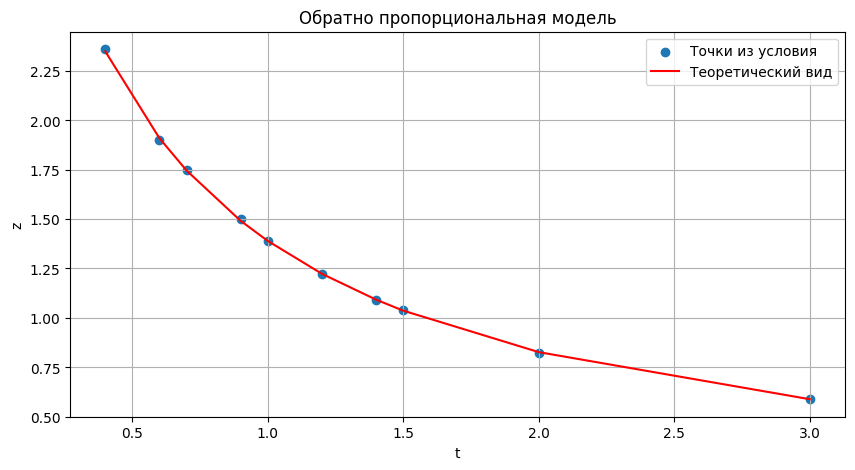

Сумма квадратов отклонений для обратно пропорциональной модели: 0.000


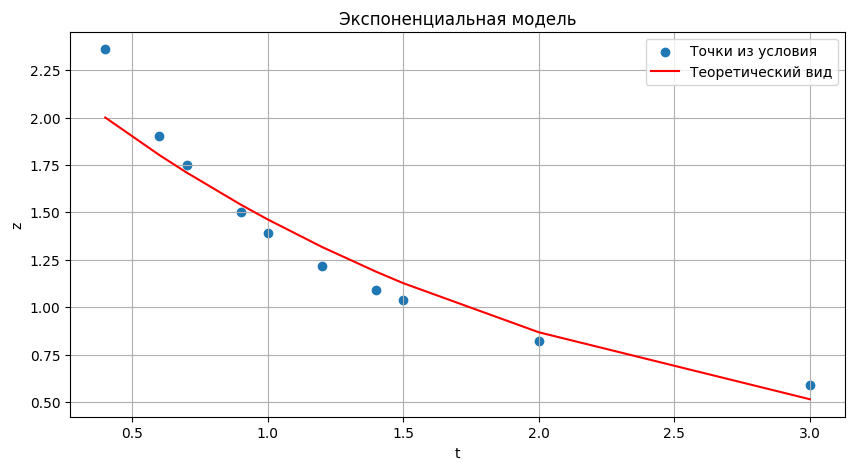

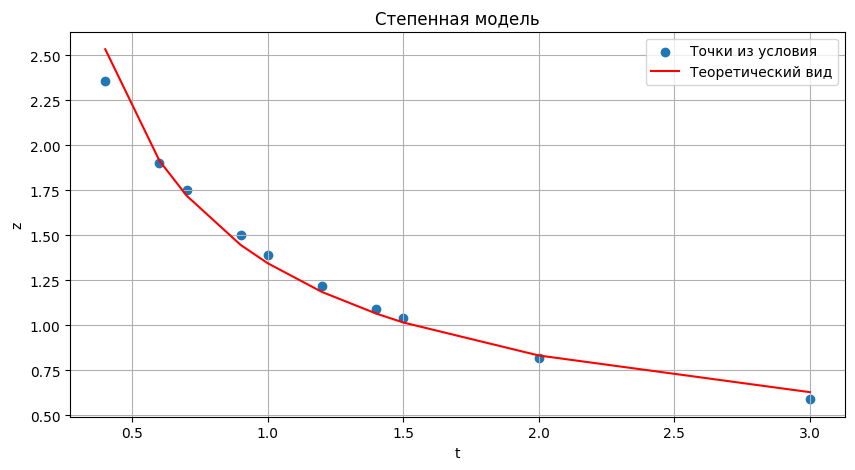

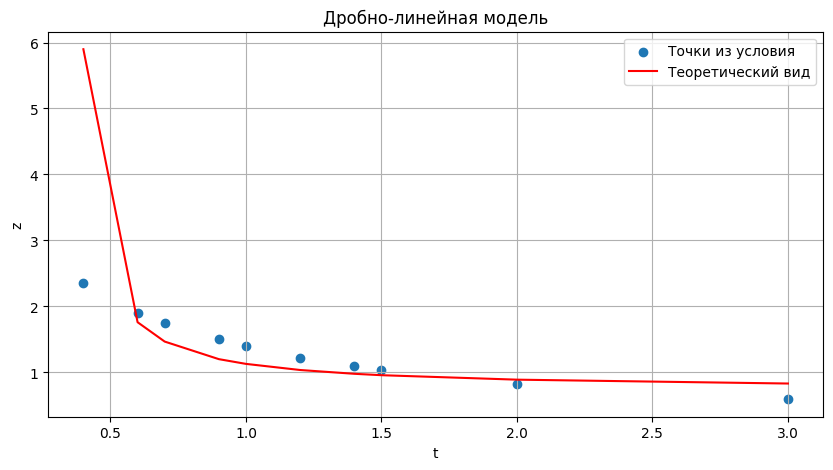

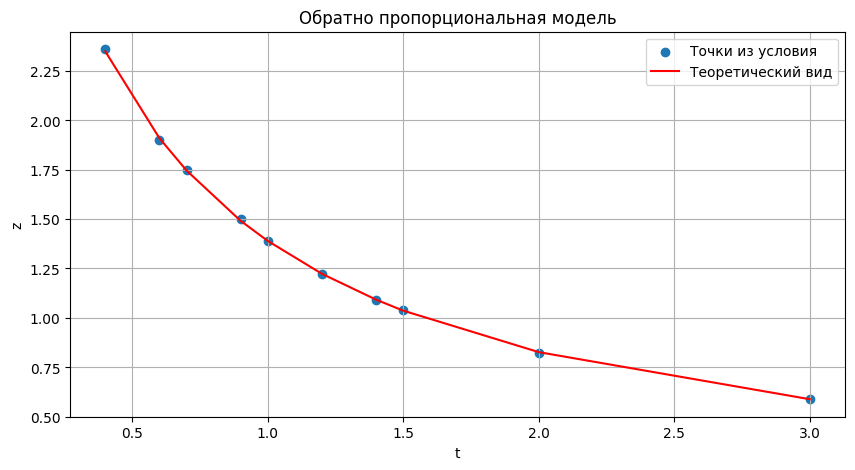

Наилучшая модель - обратно пропорциональная


In [2]:
import numpy as np
import matplotlib.pyplot as plt

t_start = np.array([0.4, 0.6, 0.7, 0.9, 1, 1.2, 1.4, 1.5, 2, 3])
z_start = np.array([2.36, 1.9, 1.75, 1.5, 1.39, 1.22, 1.09, 1.04, 0.82, 0.59])


def draw_graph(t: np.ndarray, z: np.ndarray, y_theor: np.ndarray, title: str):  # рисование
    plt.figure(figsize=(10, 5))
    plt.scatter(t, z, marker='o', label="Точки из условия")
    plt.plot(t, y_theor, label="Теоретический вид", color='red')
    plt.title(title)
    plt.xlabel('t')
    plt.ylabel('z')
    plt.legend()
    plt.grid(True)
    plt.show()


def perform_regression(x: np.ndarray, y: np.ndarray) -> tuple:
    _x = np.mean(x)  # среднее массива x
    _y = np.mean(y)  # среднее массива y
    _xy = np.mean(x * y)  # среднее произведений x*y
    _x2 = np.mean(x ** 2)  # среднее квадратов x

    b = (_xy - _x * _y) / (_x2 - _x ** 2)  # решаем систему из МНК
    a = _y - b * _x
    return a, b


def exponential(t: np.ndarray, z: np.ndarray):
    x = t
    y = np.log(z)  # линеаризуем
    a, b = perform_regression(x, y)
    y_theory = np.exp(a + b * x)
    draw_graph(t, z, y_theory, "Экспоненциальная модель")
    return np.sum(np.abs(z - y_theory) ** 2)


def power_law(t: np.ndarray, z: np.ndarray):
    x = np.log(t)  # линеаризуем
    y = np.log(z)  # линеаризуем
    a, b = perform_regression(x, y)
    y_theory = np.exp(a) * t ** b
    draw_graph(t, z, y_theory, "Степенная модель")
    return np.sum(np.abs(z - y_theory) ** 2)


def frac_lin(t: np.ndarray, z: np.ndarray):
    x = 1 / t  # линеаризуем
    y = 1 / z  # линеаризуем
    a, b = perform_regression(x, y)
    y_theory = 1 / (a + b * x)
    draw_graph(t, z, y_theory, "Дробно-линейная модель")
    return np.sum(np.abs(z - y_theory) ** 2)


def inverse_prop(t: np.ndarray, z: np.ndarray):
    x = t
    y = 1 / z  # линеаризуем
    a, b = perform_regression(x, y)
    y_theory = 1 / (a + b * x)
    draw_graph(t, z, y_theory, "Обратно пропорциональная модель")
    return np.sum(np.abs(z - y_theory) ** 2)


print(f"Сумма квадратов отклонений для экспоненциальной модели: {exponential(t_start, z_start):.3f}")
print(f"Сумма квадратов отклонений для степенной модели: {power_law(t_start, z_start):.3f}")
print(f"Сумма квадратов отклонений для дробно-линейной модели: {frac_lin(t_start, z_start):.3f}")
print(f"Сумма квадратов отклонений для обратно пропорциональной модели: {inverse_prop(t_start, z_start):.3f}")


ss = [exponential(t_start, z_start), power_law(t_start, z_start), frac_lin(t_start, z_start), inverse_prop(t_start, z_start)]
names = ["экспоненциальная", "степенная", "дробно-линейная", "обратно пропорциональная"]

print(f"Наилучшая модель - {names[ss.index(min(ss))]}")
